<a href="https://colab.research.google.com/github/Sarath-Mohan9469545/computing_lab_exp/blob/main/pca_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("/content/wine-clustering.csv")
print(df)

     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06               

In [2]:
x=df[["Alcohol",  "Malic_Acid",   "Ash",  "Ash_Alcanity",  "Magnesium",  "Total_Phenols", "Flavanoids",  "Nonflavanoid_Phenols",  "Proanthocyanins",  "Color_Intensity",   "Hue",  "OD280",  "Proline"]]


In [3]:
x

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca=pca.fit_transform(x)

In [5]:
newdf=pd.DataFrame(pca,columns=["PC1","PC2"])
print(newdf)

            PC1        PC2
0    318.562979  21.492131
1    303.097420  -5.364718
2    438.061133  -6.537309
3    733.240139   0.192729
4    -11.571428  18.489995
..          ...        ...
173   -6.980211  -4.541137
174    3.131605   2.335191
175   88.458074  18.776285
176   93.456242  18.670819
177 -186.943190  -0.213331

[178 rows x 2 columns]


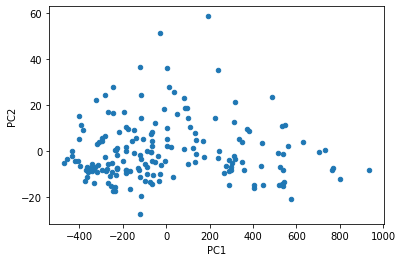

In [6]:
import matplotlib.pyplot as plt
x_axis=newdf["PC1"]
y_axis=newdf["PC2"]
plt.scatter(x_axis,y_axis, s=20, cmap="y")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [7]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(newdf)

In [12]:
c=kmeans.cluster_centers_
c

array([[ -18.48419282,    4.20263004],
       [ 448.29677492,   -2.2569996 ],
       [-288.75258647,   -2.23889973]])

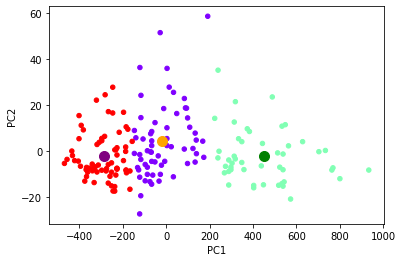

In [14]:
import matplotlib.pyplot as plt
x_axis=newdf["PC1"]
y_axis=newdf["PC2"]
labels=kmeans.labels_
plt.scatter(x_axis,y_axis, s=20,c=labels,cmap="rainbow")
plt.scatter(c[0][0],c[0][1],s=100,color="orange")
plt.scatter(c[1][0],c[1][1],s=100,color="green")
plt.scatter(c[2][0],c[2][1],s=100,color="purple")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()